# Lab 4: Working with 'real' data
## Getting data and HD5

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
from scipy.stats import norm
from scipy.stats import poisson

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [3]:
hf = h5py.File('gammaray_lab4.h5', 'r')

In [4]:
hf.keys()

<KeysViewHDF5 ['data']>

In [5]:
data = np.array(hf.get('data'))

In [6]:
data[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

## Problem 1

#### 1)

In [7]:
t = data[0,:]
solar_deg = data[1,:]
earth_long = data[2,:]
counts = data[3,:]

In [8]:
def rangePlot(x, y, start, end):
    fig, ax = plt.subplots(1, 1)
    ax.plot(x[start:end], y[start:end], 'bo', label='scatter plot of the first 1000 points')
    plt.show()

In [9]:
def samplePlot(x, y, size):
    fig, ax = plt.subplots(1, 1)
    ax.plot(x[0:len(x):size], y[0:len(y):size], 'bo', label='scatter plot every other size values')
    plt.show()

In [10]:
def samplePlotLine(x, y, size):
    fig, ax = plt.subplots(1, 1)
    ax.plot(x[0:len(x):size], y[0:len(y):size], 'b-', label='scatter plot every other size values')
    plt.yscale('log')
    plt.show()

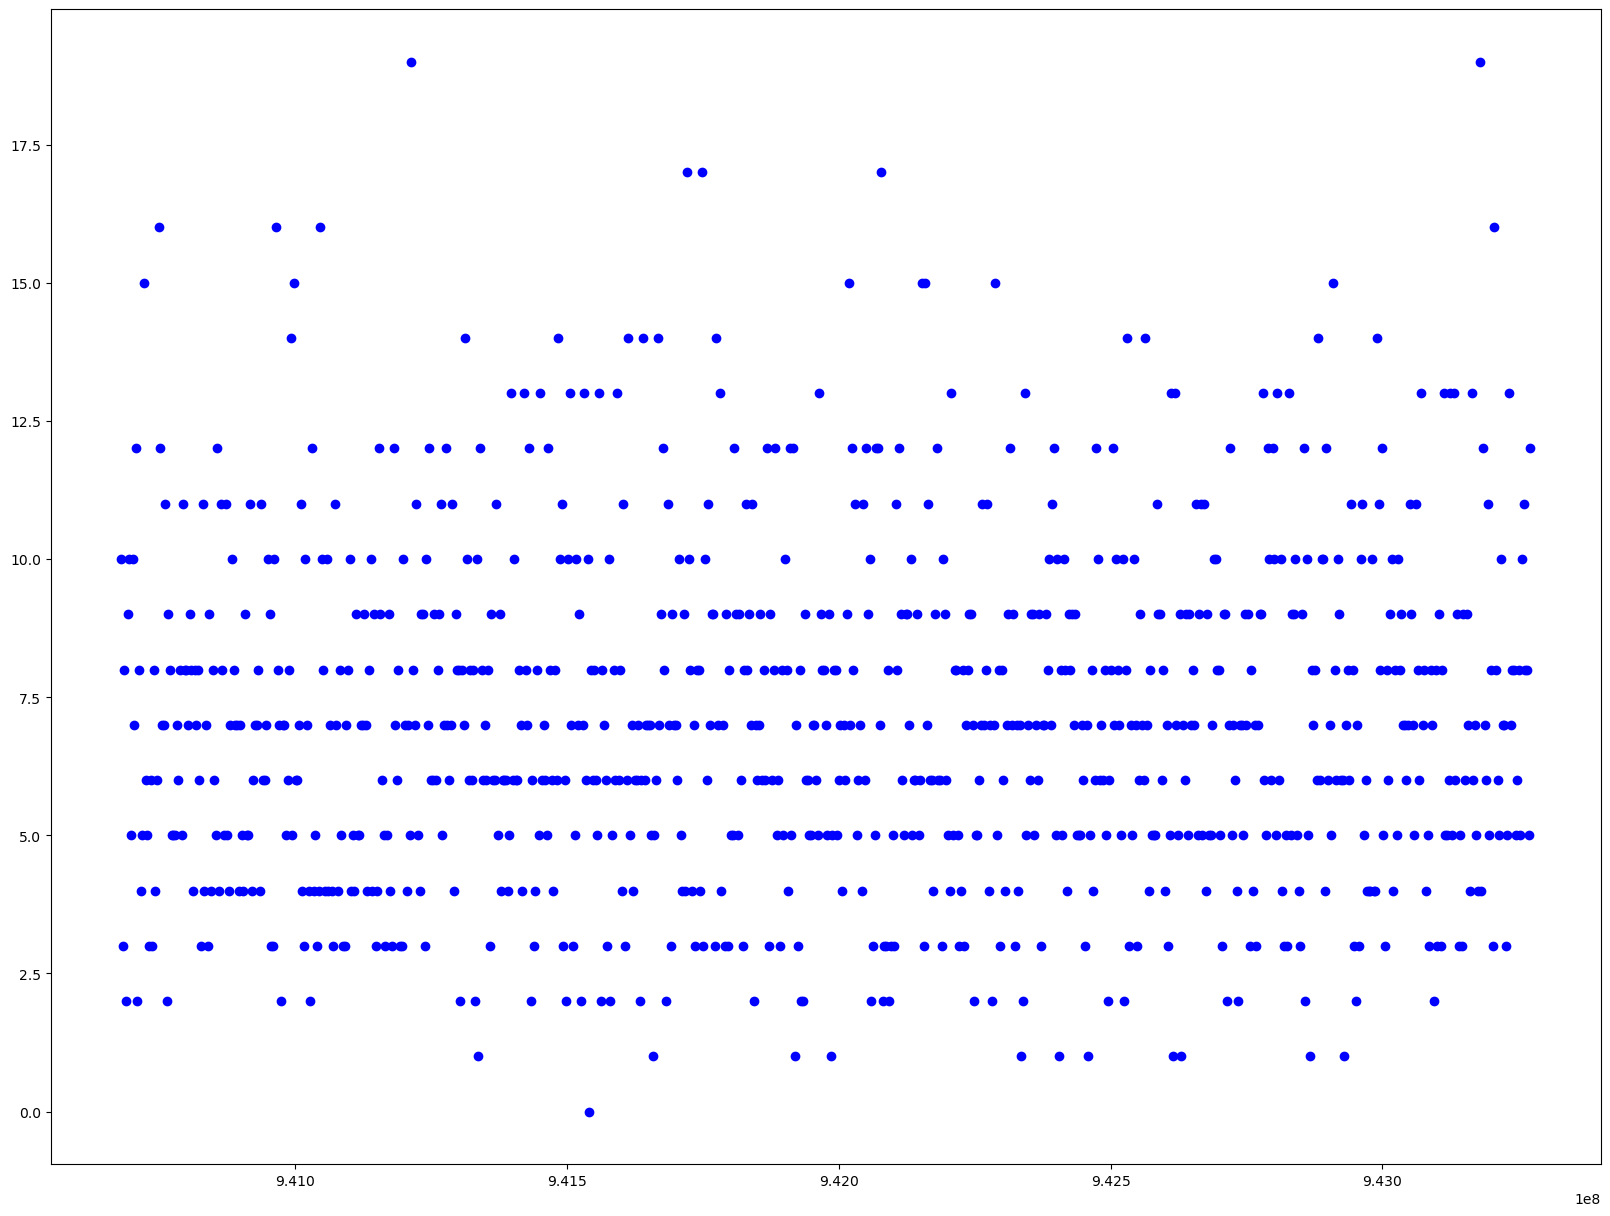

In [11]:
samplePlot(t, counts, 30000)

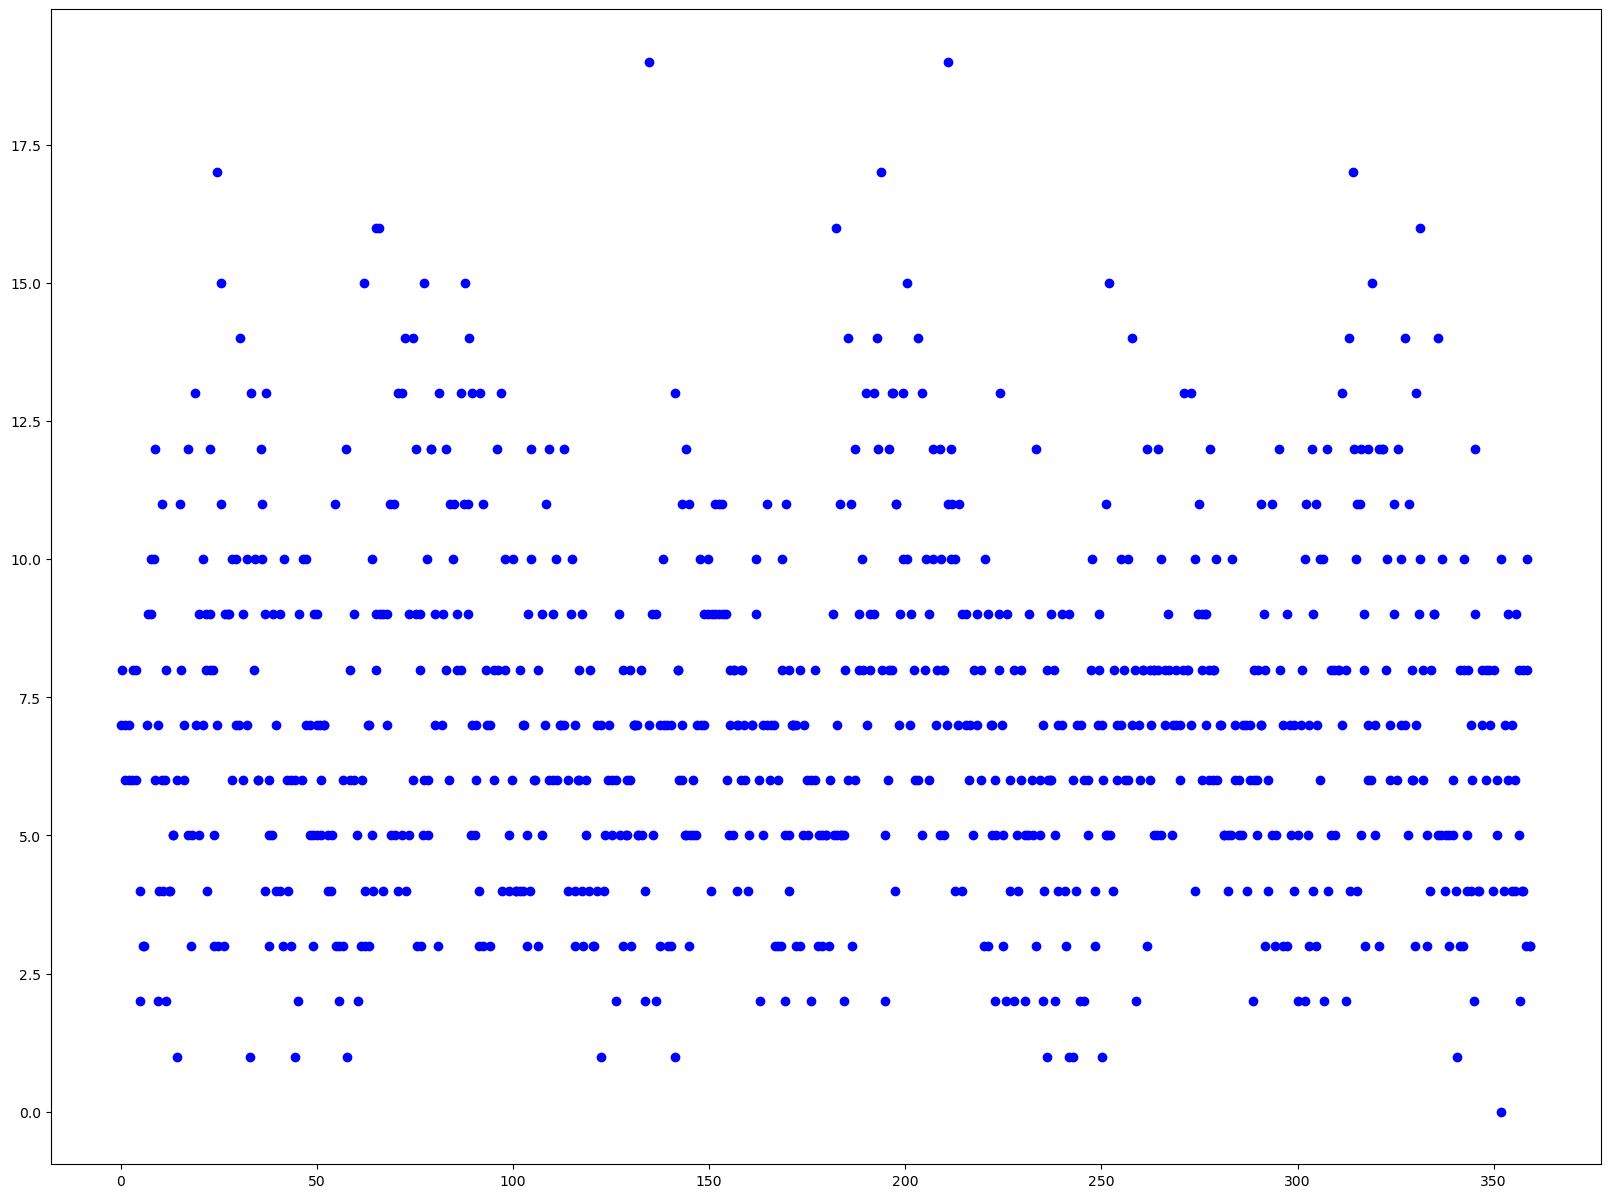

In [12]:
samplePlot(solar_deg, counts, 30000)

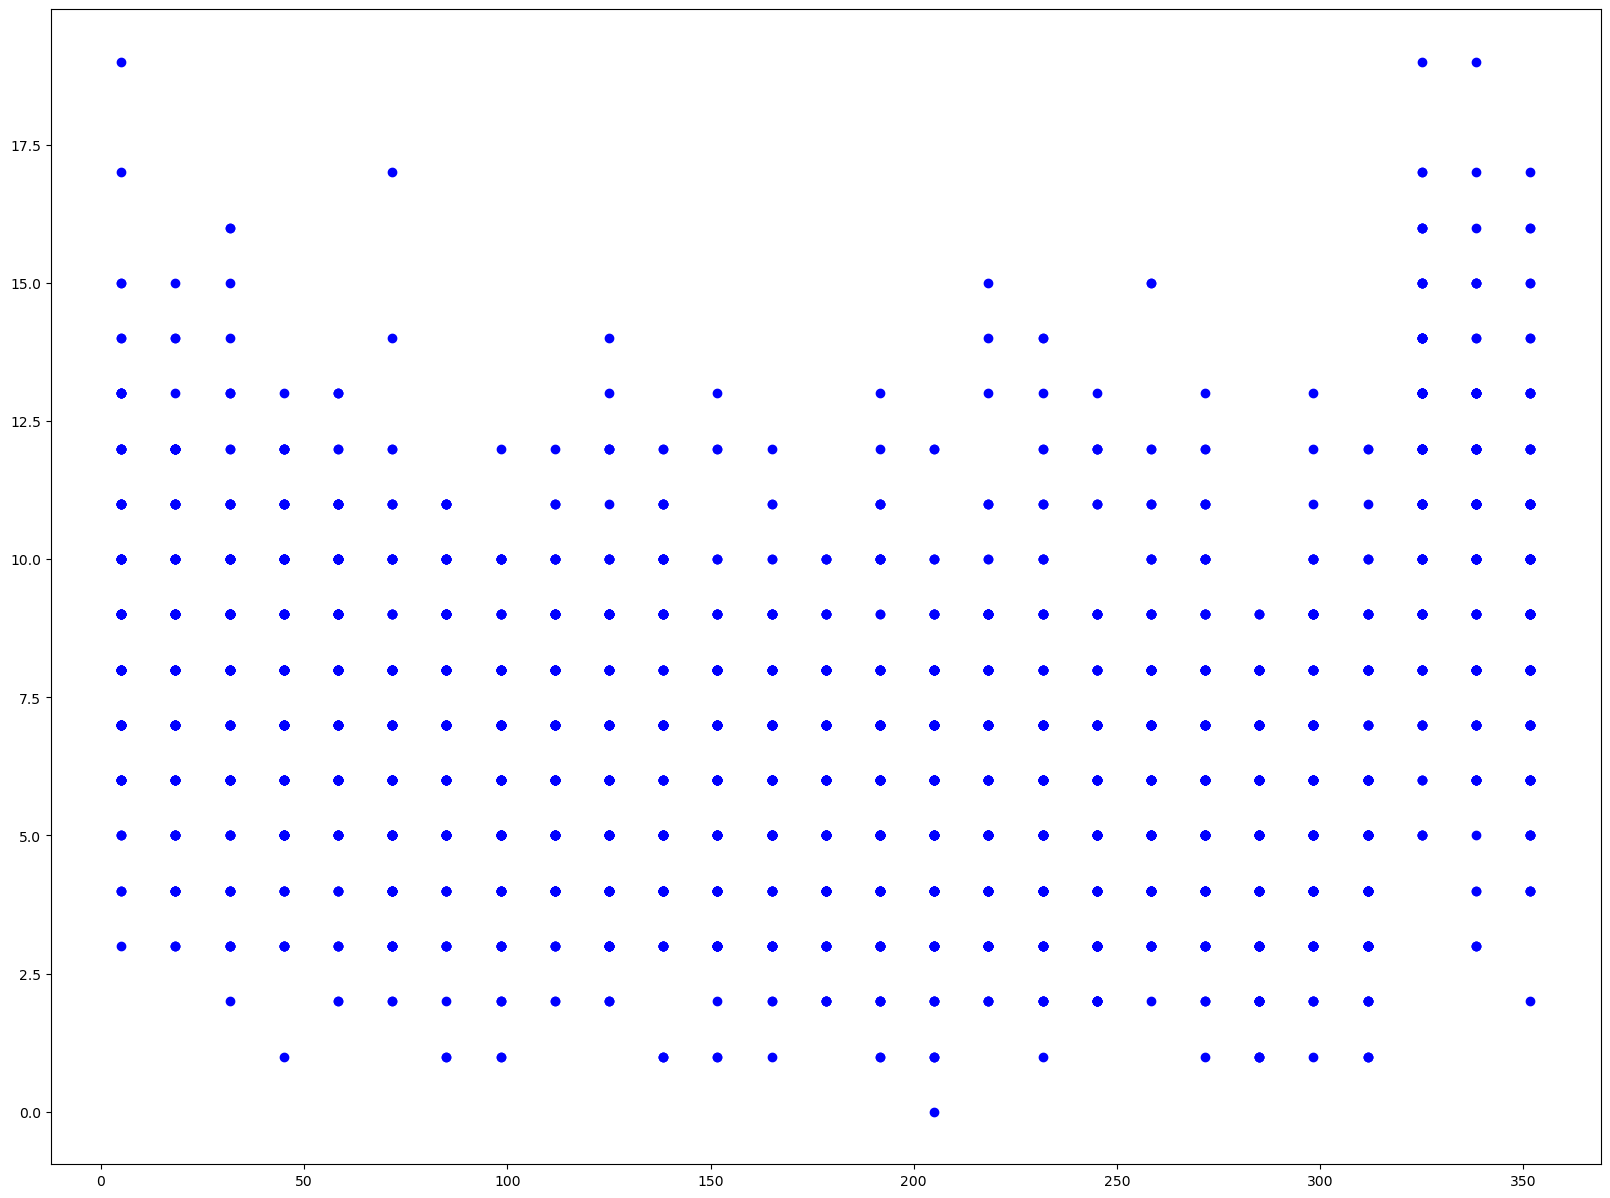

In [13]:
samplePlot(earth_long, counts, 10000)

From the above plots we can observe different relationships between different features in the dataset and the counts. For the above graph, I plotted time v. counts and solar degree v. counts with a point for every 50000 points and Earth longitude v. counts with a point for every 10000 points for clearer representation of the data. From above graphs we can see that because the counts are discrete and almost all other values have a relative smaller x unit, the plot shows some concentrated horizontal lines mainly in the center of the plot with lower density on the edges. 

#### 2)

In [14]:
mean = np.mean(counts)
mean

7.09730524315952

In [15]:
variance = mean*mean
variance

50.371741714579606

The background is changing and the gross variance of the counts is about 50.

#### 3)

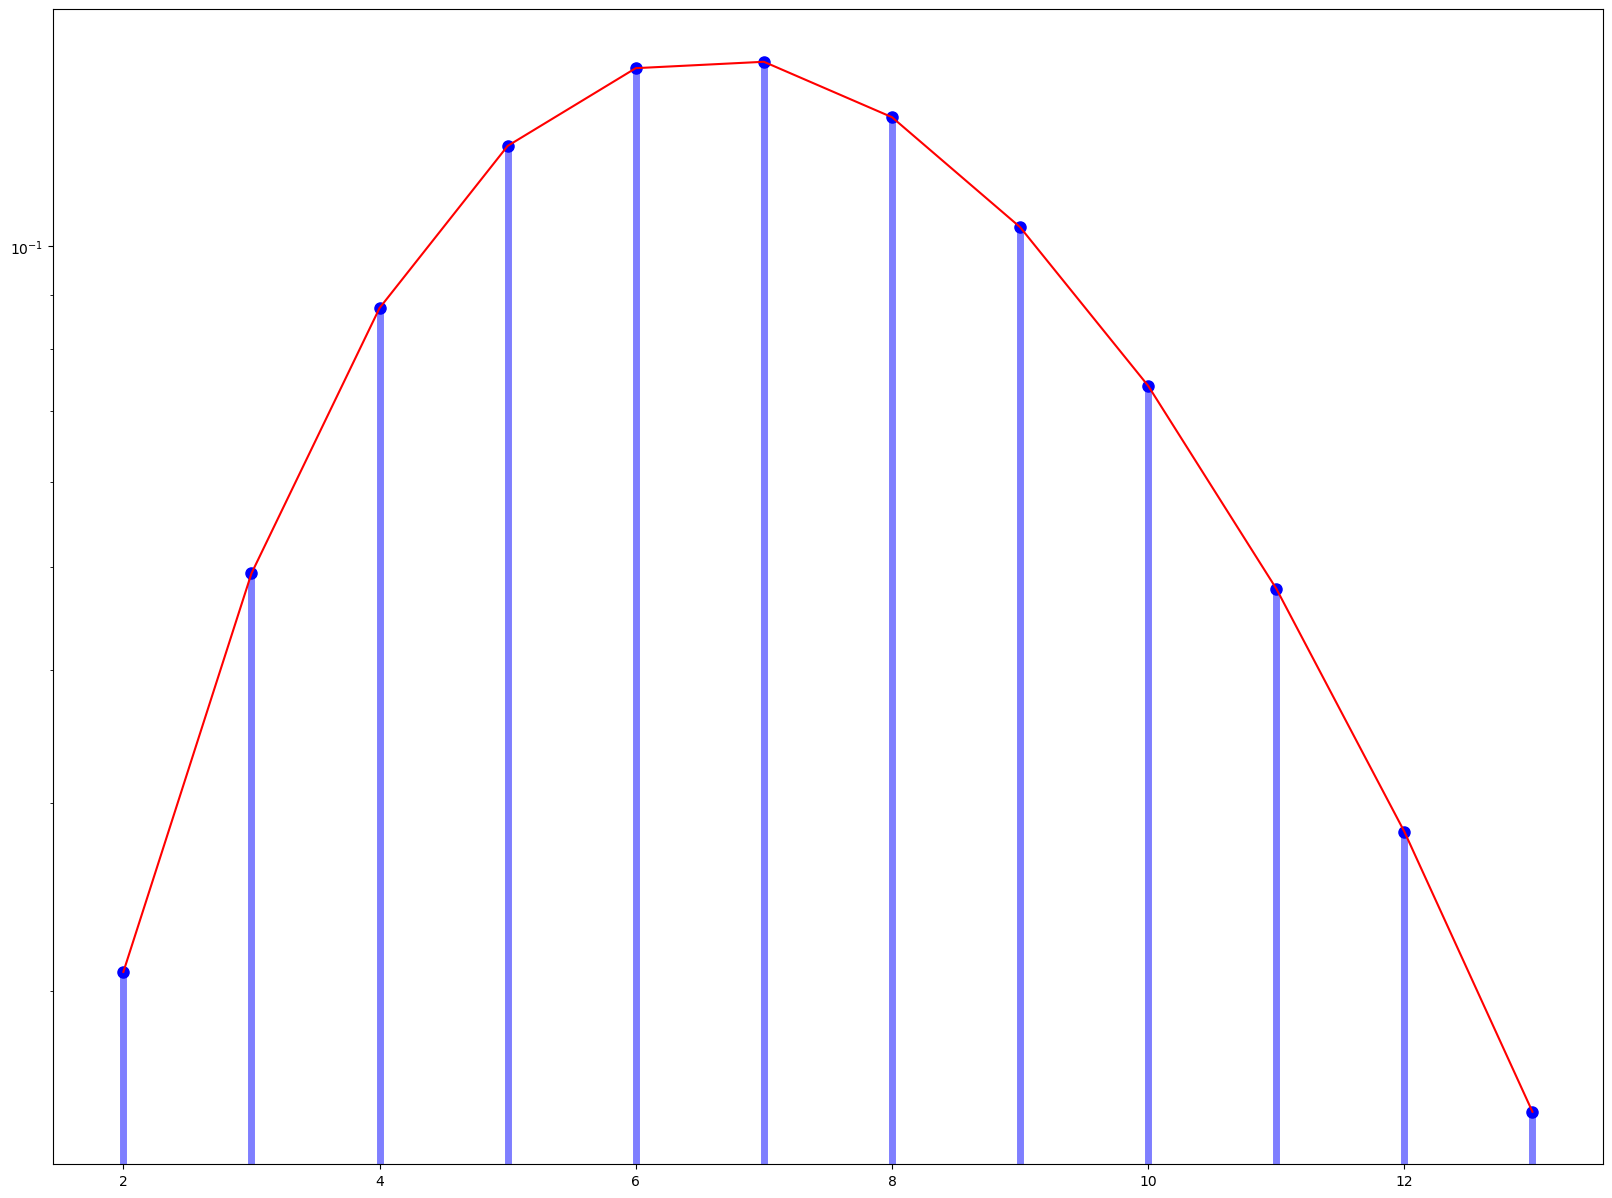

In [16]:
fig, ax = plt.subplots(1, 1)
x = np.arange(poisson.ppf(0.01, mean),
              poisson.ppf(0.99, mean))
ax.plot(x, poisson.pmf(x, mean), 'bo', ms=8, label='poisson pmf')
ax.plot(x, poisson.pmf(x, mean), 'r-', ms=8, label='poisson pmf')
plt.yscale('log')
ax.vlines(x, 0, poisson.pmf(x, mean), colors='b', lw=5, alpha=0.5)
plt.show()

In [17]:
sigma5 = 1/3.5e6
det = stats.poisson.ppf(1-sigma5, mean)
det

24.0

In [18]:
len(counts)

25920001

In [19]:
index = 0
newdata = np.ndarray(shape=(4,25920001))
for i in range(25920001):
    if counts[i] < 24:
        newdata[:,index]=data[:,i]
        index=index+1

In [20]:
newdata[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

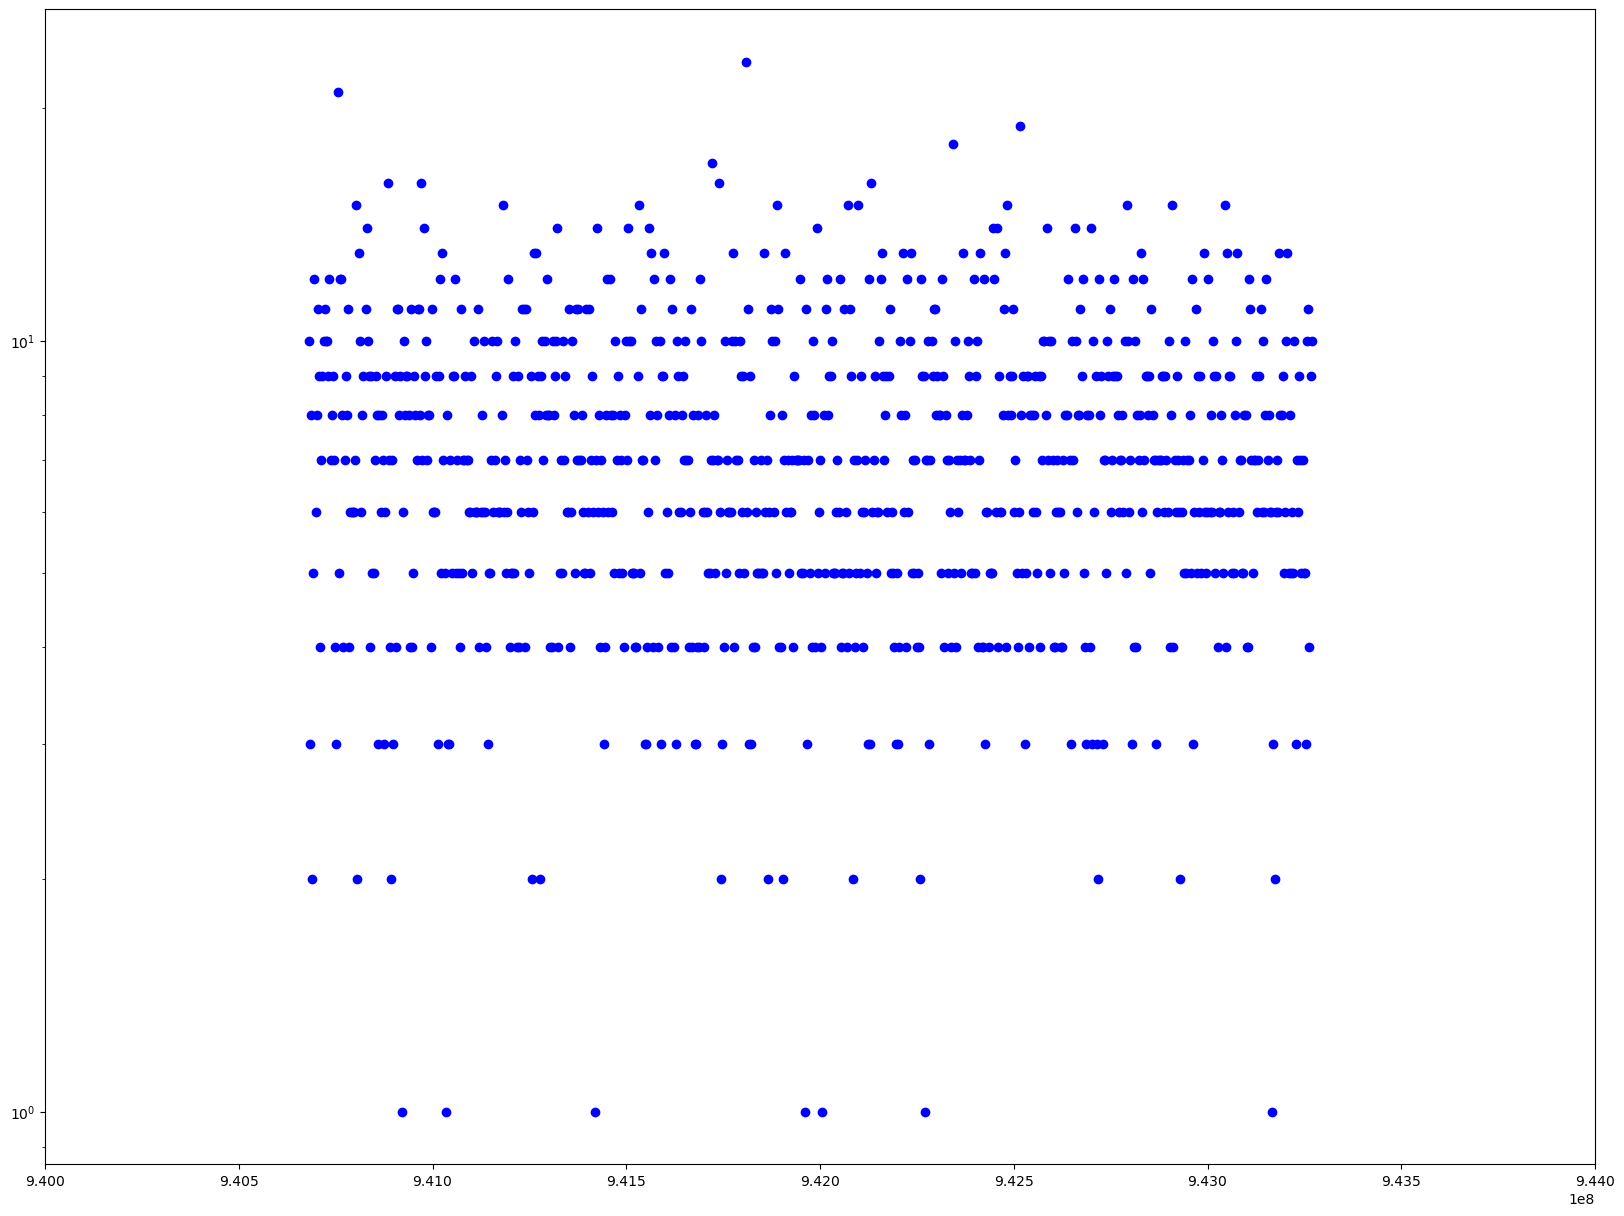

In [21]:
fig, ax = plt.subplots(1, 1)
x = newdata[0,:]
y = newdata[3,:]
size = 30000
ax.plot(x[0:len(x):size], y[0:len(y):size], 'bo')
plt.yscale('log')
plt.xlim(9.4*int(1e8),9.44*int(1e8))
plt.show()

The model looks like it is signal free data which still does not show a consistent model. 

#### 4)

In [22]:
sigma5 = 1/3.5e6
det = stats.poisson.ppf(1-sigma5, mean)
det

24.0

The 5-sigma threshold is 24.

## Problem 2
#### 1)

In [23]:
hf = h5py.File('images.h5', 'r')

In [24]:
hf.keys()

<KeysViewHDF5 ['image1', 'imagestack']>

In [25]:
data = np.array(hf.get('imagestack'))

In [26]:
image1 = data[:,:,0]
image2 = data[:,:,1]
image3 = data[:,:,2]
image4 = data[:,:,3]
image5 = data[:,:,4]
image6 = data[:,:,5]
image7 = data[:,:,6]
image8 = data[:,:,7]
image9 = data[:,:,8]
image10 = data[:,:,9]

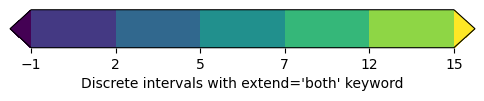

In [27]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.viridis
bounds = [-1, 2, 5, 7, 12, 15]
normal = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

fig.colorbar(mpl.cm.ScalarMappable(norm=normal, cmap=cmap),
             cax=ax, orientation='horizontal',
             label="Discrete intervals with extend='both' keyword")

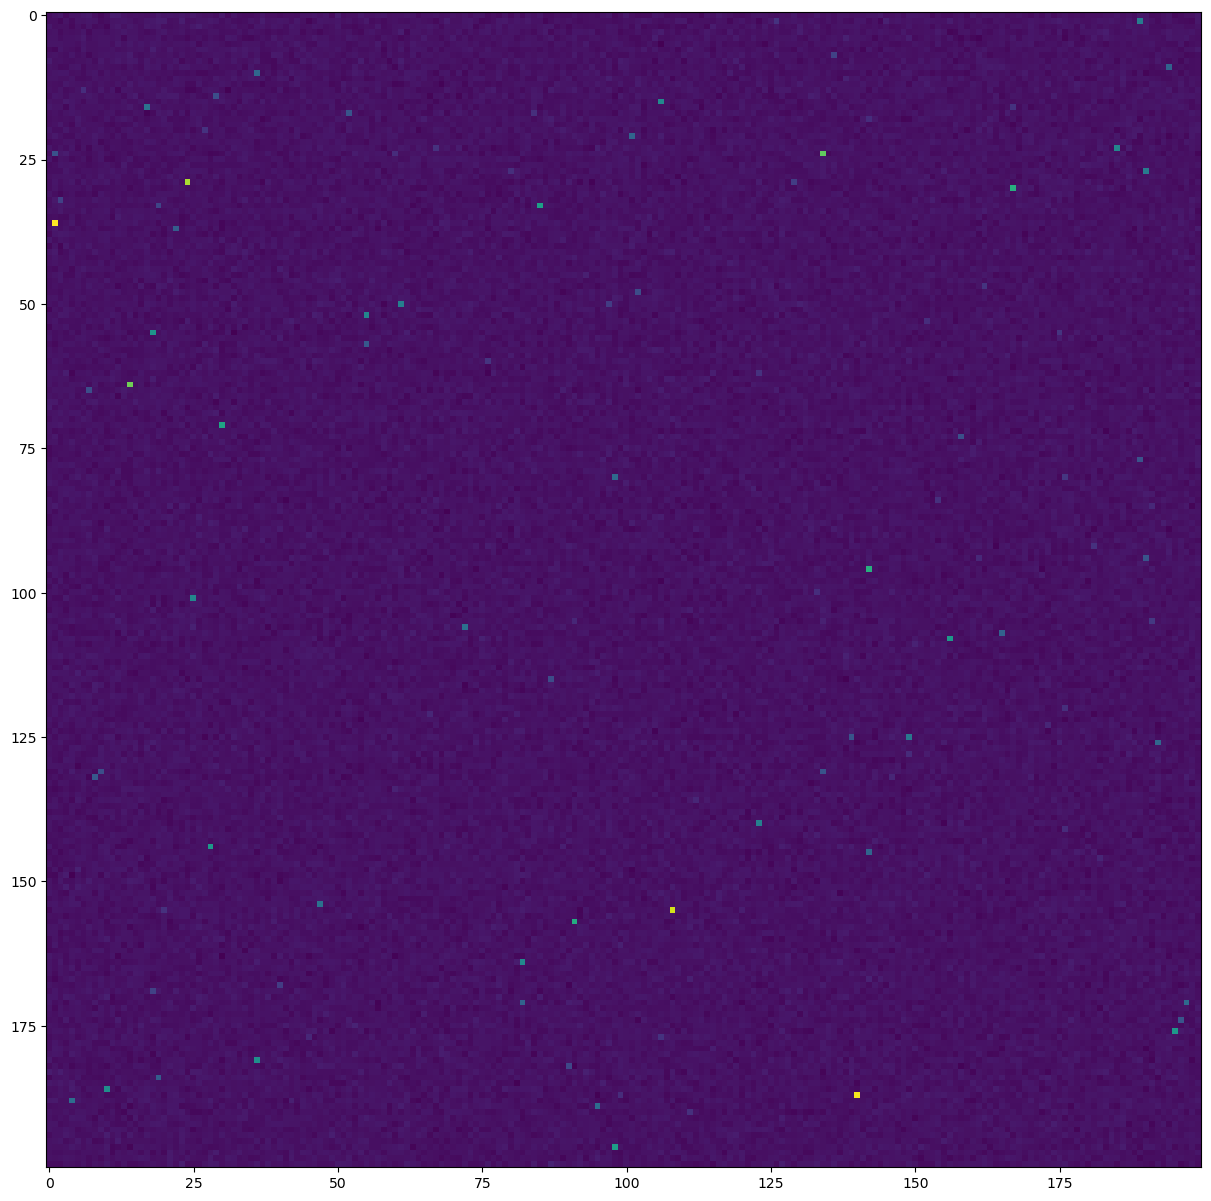

In [43]:
fig, ax = plt.subplots(1, 1)
ax.imshow(image1)
plt.show()

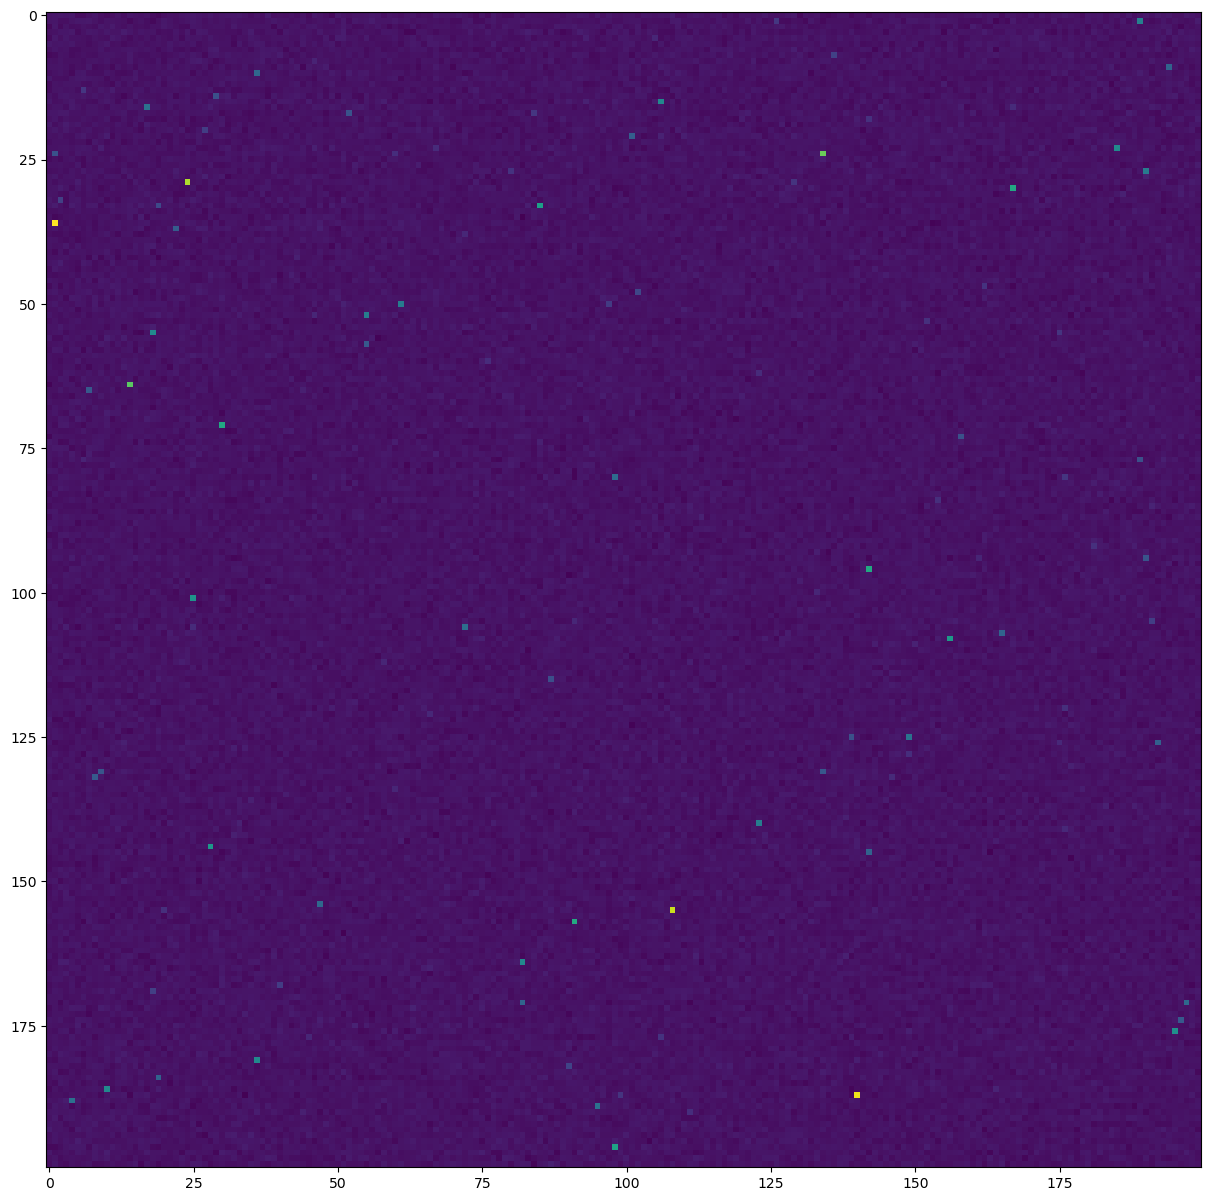

In [44]:
fig, ax = plt.subplots(1, 1)
ax.imshow(image2)
plt.show()

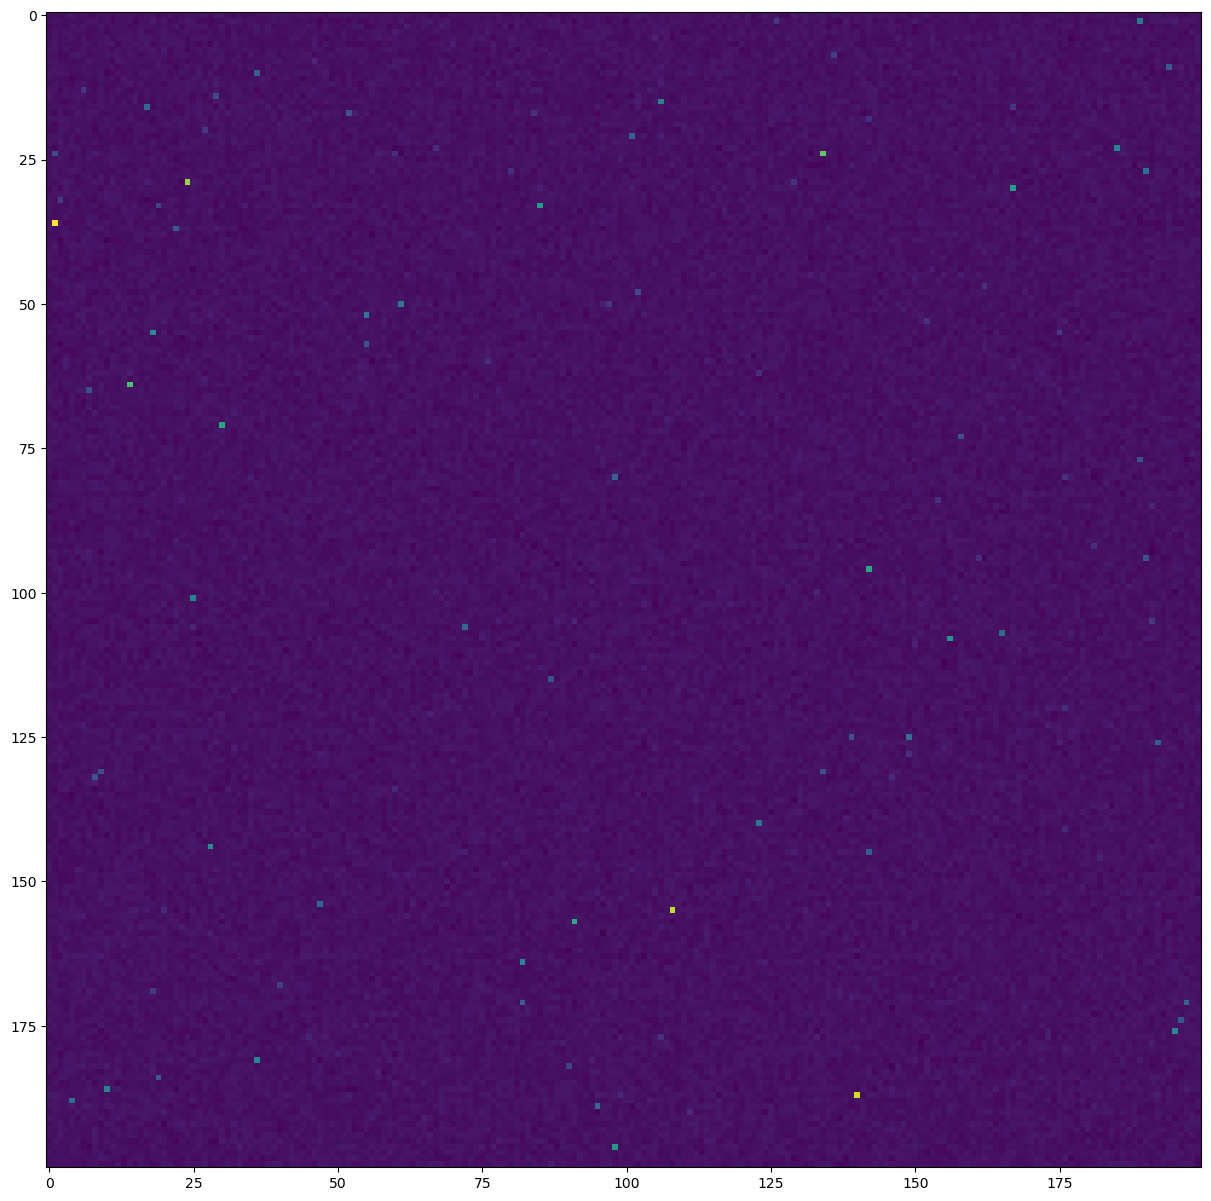

In [45]:
fig, ax = plt.subplots(1, 1)
ax.imshow(image3)
plt.show()

From the above plots we can see that there are some very bright points which can be observed throughout various graphs. This means there are some contaminations. I cannot tell whether the background is time dependent. We can try to find the signal by subtracting the selected graph data with other graph's data which would result in background data. 

#### 3)

I am hunting for the faintest star:

In [74]:
imagesum1 = image2+image3+image4+image5+image6+image7+image8+image9
imageavg1 = (imagesum1)/9
bkgd1 = image1 - imageavg1

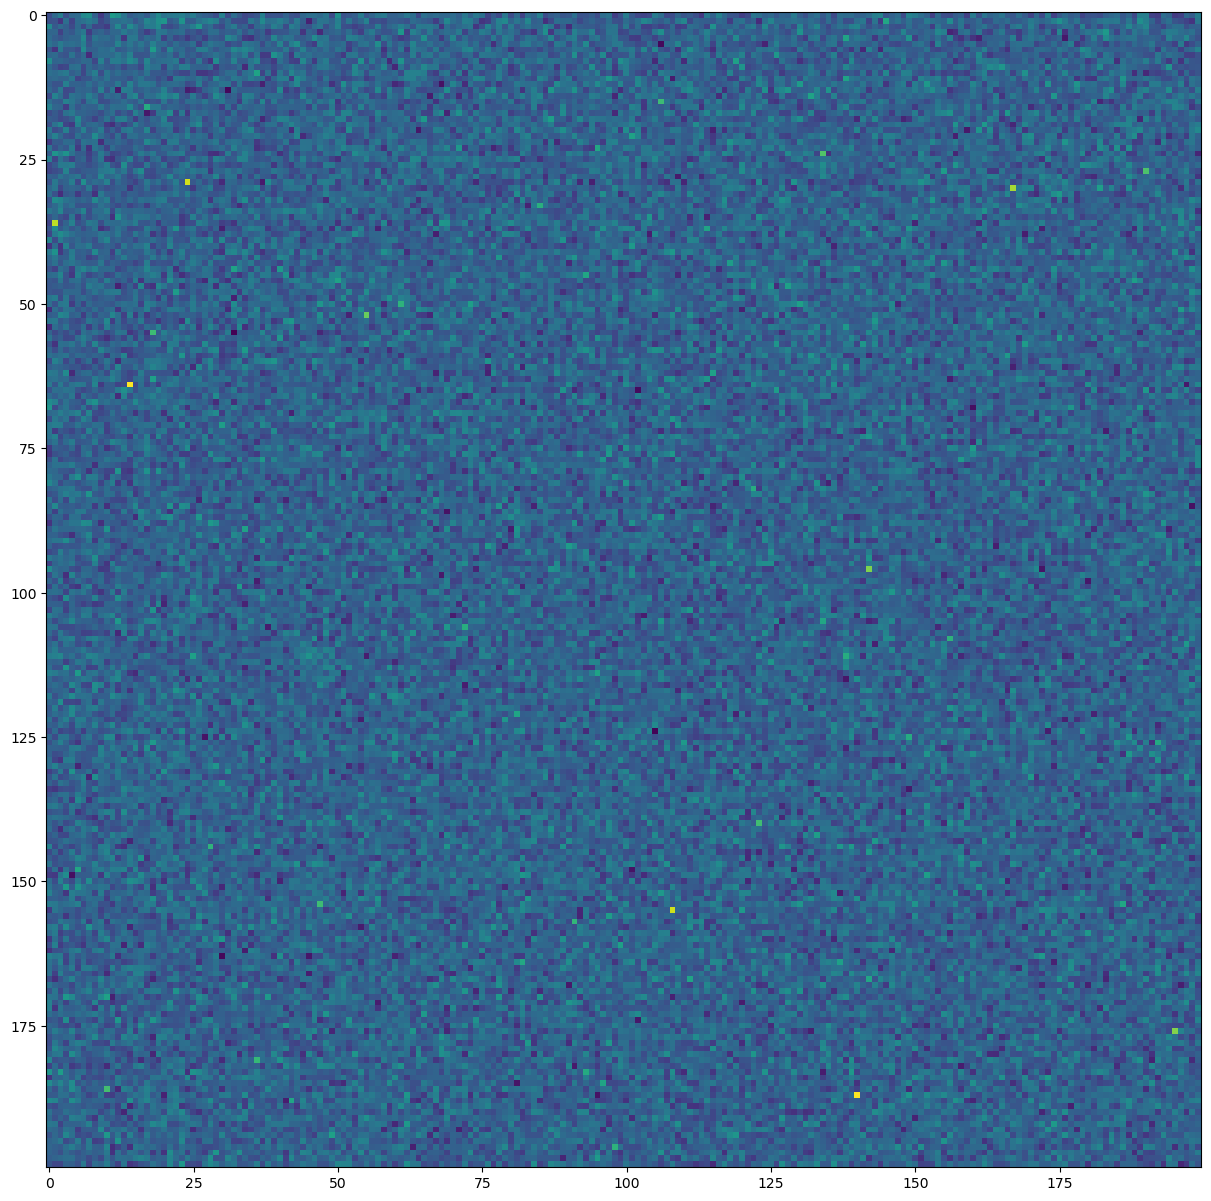

In [75]:
fig, ax = plt.subplots(1, 1)
ax.imshow(bkgd1)
plt.show()

In [92]:
signal1 = image1 - bkgd1
minval1 = 1000
xmin1 = 0
ymin1 = 0
for i in range(200):
    for j in range(200):
        curr = image1[i,j]
        if curr < minval1:
            minval1 = curr
            xmin1 = i
            ymin1 = j
print(xmin1)
print(ymin1)
print(minval1)
faintest1 = np.array([xmin1, ymin1, minval1, 1])

55
32
-2.283915564822921


In [93]:
imagesum2 = image1+image3+image4+image5+image6+image7+image8+image9
imageavg2 = (imagesum2)/9
bkgd2 = image2 - imageavg2
signal2 = image2 - bkgd2
minval2 = 1000
xmin2 = 0
ymin2 = 0
for i in range(200):
    for j in range(200):
        curr = image2[i,j]
        if curr < minval2:
            minval2 = curr
            xmin2 = i
            ymin2 = j
print(xmin2)
print(ymin2)
print(minval2)
faintest2 = np.array([xmin2, ymin2, minval2, 2])

35
82
-2.431318269785951


In [94]:
imagesum3 = image1+image2+image4+image5+image6+image7+image8+image9
imageavg3 = (imagesum3)/9
bkgd3 = image3 - imageavg3
signal3 = image3 - bkgd3
minval3 = 1000
xmin3 = 0
ymin3 = 0
for i in range(200):
    for j in range(200):
        curr = image3[i,j]
        if curr < minval3:
            minval3 = curr
            xmin3 = i
            ymin3 = j
print(xmin3)
print(ymin3)
print(minval3)
faintest3 = np.array([xmin3, ymin3, minval3, 3])

172
146
-2.2423795336690366


In [95]:
imagesum4 = image1+image2+image3+image5+image6+image7+image8+image9
imageavg4 = (imagesum4)/9
bkgd4 = image4 - imageavg4
signal4 = image4 - bkgd4
minval4 = 1000
xmin4 = 0
ymin4 = 0
for i in range(200):
    for j in range(200):
        curr = image4[i,j]
        if curr < minval4:
            minval4 = curr
            xmin4 = i
            ymin4 = j
print(xmin4)
print(ymin4)
print(minval4)
faintest4 = np.array([xmin4, ymin4, minval4, 4])

175
56
-2.709336827866645


In [96]:
imagesum5 = image1+image2+image3+image4+image6+image7+image8+image9
imageavg5 = (imagesum5)/9
bkgd5 = image5 - imageavg5
signal5 = image5 - bkgd5
minval5 = 1000
xmin5 = 0
ymin5 = 0
for i in range(200):
    for j in range(200):
        curr = image5[i,j]
        if curr < minval5:
            minval5 = curr
            xmin5 = i
            ymin5 = j
print(xmin5)
print(ymin5)
print(minval5)
faintest5 = np.array([xmin5, ymin5, minval5, 5])

3
152
-2.25293270073526


In [97]:
imagesum6 = image1+image2+image3+image4+image5+image7+image8+image9
imageavg6 = (imagesum6)/9
bkgd6 = image6 - imageavg6
signal6 = image6 - bkgd6
minval6 = 1000
xmin6 = 0
ymin6 = 0
for i in range(200):
    for j in range(200):
        curr = image6[i,j]
        if curr < minval6:
            minval6 = curr
            xmin6 = i
            ymin6 = j
print(xmin6)
print(ymin6)
print(minval6)
faintest6 = np.array([xmin6, ymin6, minval6, 6])

1
39
-2.6496072842241567


In [98]:
imagesum7 = image1+image2+image3+image4+image5+image6+image8+image9
imageavg7 = (imagesum7)/9
bkgd7 = image7 - imageavg7
signal7 = image7 - bkgd7
minval7 = 1000
xmin7 = 0
ymin7 = 0
for i in range(200):
    for j in range(200):
        curr = image7[i,j]
        if curr < minval7:
            minval7 = curr
            xmin7 = i
            ymin7 = j
print(xmin7)
print(ymin7)
print(minval7)
faintest7 = np.array([xmin7, ymin7, minval7, 7])

137
83
-2.4226087000140812


In [99]:
imagesum8 = image1+image2+image3+image4+image5+image6+image7+image9
imageavg8 = (imagesum8)/9
bkgd8 = image8 - imageavg8
signal8 = image8 - bkgd8
minval8 = 1000
xmin8 = 0
ymin8 = 0
for i in range(200):
    for j in range(200):
        curr = image8[i,j]
        if curr < minval8:
            minval8 = curr
            xmin8 = i
            ymin8 = j
print(xmin8)
print(ymin8)
print(minval8)
faintest8 = np.array([xmin8, ymin8, minval8, 8])

23
199
-2.491442987659155


In [100]:
imagesum9 = image1+image2+image3+image4+image5+image6+image7+image8
imageavg9 = (imagesum9)/9
bkgd9 = image9 - imageavg9
signal9 = image9 - bkgd9
minval9 = 1000
xmin9 = 0
ymin9 = 0
for i in range(200):
    for j in range(200):
        curr = image9[i,j]
        if curr < minval9:
            minval9 = curr
            xmin9 = i
            ymin9 = j
print(xmin9)
print(ymin9)
print(minval9)
faintest9 = np.array([xmin9, ymin9, minval9, 9])

110
49
-2.311568015810453


In [101]:
faintest = [faintest1, faintest2, faintest3, faintest4, faintest5, faintest6, faintest7, faintest8, faintest9]
faintest

[array([55.        , 32.        , -2.28391556,  1.        ]),
 array([35.        , 82.        , -2.43131827,  2.        ]),
 array([172.        , 146.        ,  -2.24237953,   3.        ]),
 array([175.        ,  56.        ,  -2.70933683,   4.        ]),
 array([  3.       , 152.       ,  -2.2529327,   5.       ]),
 array([ 1.        , 39.        , -2.64960728,  6.        ]),
 array([137.       ,  83.       ,  -2.4226087,   7.       ]),
 array([ 23.        , 199.        ,  -2.49144299,   8.        ]),
 array([110.        ,  49.        ,  -2.31156802,   9.        ])]

We can see that we created an array as the collection of all 9 faintest stars which include their position in the graph, their values and the image they appeared.

#### 4)

We have different pdf because we are observing different values from the dataset. In order to find the maximum value, we need to cancel the bright contaminations where if we try to find the minimum value, we nned to cancel the faint contaminations. The different p